In [1]:
# Create an alias with the as keyword while importing
# Now you can refer to the Pandas package as pd instead of pandas
import pandas as pd

# **Previous Content**

# Data Analytics (Basic Summary Statistics)

In [2]:
# Load the CSV into a dataframe called sales
sales = pd.read_csv('./sales_data.csv')
print(sales)

   Transaction_ID Customer_ID Product_ID  Quantity    Price       Date
0               1        C101       P001         2  2099.00   1/5/2023
1               2        C102       P002         1    29.99   20230106
2               3        C103       P001         1    20.99   1/7/2023
3               4        C101       P003         3     9.99   1/8/2023
4               5        C102       P002         2    29.99   1/9/2023
5               6        C105       P001         1    20.99  1/10/2023
6               7        C102       P004         1      NaN  1/11/2023
7               8        C106       P001         2    20.99  1/12/2023
8               9        C103       P005         1     9.99  1/13/2023
9               9        C103       P005         1     9.99  1/13/2023


In [3]:
# For each transaction, transaction amount = quantity * price
# Add a column for transaction amount
sales['TransactionAmount'] = sales['Quantity'] * sales['Price']

In [4]:
# What is the average transaction amount?
# Automatically ignored null values when calculating the mean
sales['TransactionAmount'].mean()

np.float64(491.31999999999994)

In [5]:
# What is the total transaction amount?
# Automatically ignored null values when calculating the sum
sales['TransactionAmount'].sum()

np.float64(4421.879999999999)

In [6]:
sales['TransactionAmount'].max()

np.float64(4198.0)

In [7]:
# Use .groupby() to group your data and execute functions (e.g., sum) on these groups
sales.groupby('Customer_ID').sum() # .sum() calculates the total of numeric columns and concatenates the string columns
# Row index 6 has null values in Price and TransactionAmount columns
# The null values in Price and TransactionAmount are ignored
# Other numeric columns (Transaction_ID, Quantity) in row index 6 are not ignored

,Transaction_ID,Product_ID,Quantity,Price,Date,TransactionAmount
Customer_ID,,,,,,
C101,5,P001P003,5,2108.99,1/5/20231/8/2023,4227.97
C102,14,P002P002P004,4,59.98,202301061/9/20231/11/2023,89.97
C103,21,P001P005P005,3,40.97,1/7/20231/13/20231/13/2023,40.97
C105,6,P001,1,20.99,1/10/2023,20.99
C106,8,P001,2,20.99,1/12/2023,41.98


In [8]:
# The null values can be confusing and intervene with our analysis
# The best practice is to clean up the null values (and other problems) before analysis

**Step 1 (Revision - Handle Duplicates): Remove duplicated rows in the sales dataframe with keeping the first occurence**

In [9]:
# Load the CSV into a dataframe
sales = pd.read_csv('./sales_data.csv')
# Clean the sales data
# Step 1: Remove duplicated rows
sales.drop_duplicates(inplace = True)

**Step 2 (Revision: Correct Wrong Values): Change the price of Product P001 to 20.99 and recalculate transaction amount (Quantity * Price)**

In [10]:
# Step 2: Correct wrong values
sales.loc[sales['Product_ID'] == 'P001', 'Price'] = 20.99
sales['TransactionAmount'] = sales['Quantity'] * sales['Price']

**Step 3 (Revision: Fill Null Values): Change the null value of Price to the weighted price of all other products in the sales table (i.e., total transaction amount of all the products divided by total quantity of all the products) and recalculate transaction amount**

In [11]:
# Step 3: Clean null values
weighted_price = sales['TransactionAmount'].sum() / sales['Quantity'].sum()
sales['Price'] = sales['Price'].fillna(weighted_price)
# Recalculate Transaction Amount
sales['TransactionAmount'] = sales['Quantity'] * sales['Price']

In [12]:
# We can specify to only perform .sum() on the TransactionAmount column
total_amount_per_customer = sales.groupby('Customer_ID')['TransactionAmount'].sum()
print(total_amount_per_customer)
print()
print(type(total_amount_per_customer))

Customer_ID
C101     71.950000
C102    108.246429
C103     30.980000
C105     20.990000
C106     41.980000
Name: TransactionAmount, dtype: float64

<class 'pandas.core.series.Series'>


In [13]:
# We can specify to perform .sum() on more than one column
sales.groupby('Customer_ID')[['TransactionAmount', 'Transaction_ID']].sum() # summing transaction ID is not meaningful

,TransactionAmount,Transaction_ID
Customer_ID,,
C101,71.950000,5
C102,108.246429,14
C103,30.980000,12
C105,20.990000,6
C106,41.980000,8


**Practice 1: Write code to answer the following question: for each product, what is its average price weighted by transaction quantity?**

In [14]:
prod = sales.groupby('Product_ID')[['TransactionAmount','Quantity']].sum()
prod['weighted_price'] = prod['TransactionAmount'] / prod['Quantity']
print(prod)

            TransactionAmount  Quantity  weighted_price
Product_ID                                             
P001               125.940000         6       20.990000
P002                89.970000         3       29.990000
P003                29.970000         3        9.990000
P004                18.276429         1       18.276429
P005                 9.990000         1        9.990000


# Data Analytics (More Summary Statistics)

In [15]:
# Use .value_counts() to count the number of transactions for each customer
sales['Customer_ID'].value_counts()

Customer_ID
C102    3
C101    2
C103    2
C105    1
C106    1
Name: count, dtype: int64

**Practice 2: Write code to count the number of transactions for each pair of customer and product**

In [16]:
sales.groupby('Customer_ID')['Product_ID'].count() # to get the proportion

Customer_ID
C101    2
C102    3
C103    2
C105    1
C106    1
Name: Product_ID, dtype: int64

In [17]:
# Use .nlargest() to get the top five customers with the largest total amount
total_amount_per_customer.nlargest(5) # total_amount_per_customer is a pandas series

Customer_ID
C102    108.246429
C101     71.950000
C106     41.980000
C103     30.980000
C105     20.990000
Name: TransactionAmount, dtype: float64

In [18]:
# Use .idxmax() to return the label of first occurrence of maximum value
total_amount_per_customer.idxmax()

'C102'

**Practice 3: Use .nlargest(), .nsmallest(), .idxmax(), and .idxmin() to write code to get the product with the highest and lowest average price weighted by transaction quantity**

**Hint 1: Use your answer from Practice 2**

**Hint 2: Read resources here: https://tutorialsinhand.com/Articles/pandas-dataframe---nsmallest-and-nlargest.aspx and https://proclusacademy.com/blog/quicktip/pandas-idxmin-idxmax/**

**The second resource also talks about having repeated max and min values**

# **New Content**

# Handling More Than One Dataframe

In [ ]:
# Run this cell for preparation
# Load the CSV into a dataframe
sales = pd.read_csv('./sales_data.csv')

# Clean the sales data
# Step 1: Remove duplicated rows
sales.drop_duplicates(inplace = True) # We set inplace = True to make sure that the method does NOT return a new dataframe, but it will remove all duplicates from the original dataframe

# Step 2: Correct wrong values
sales.loc[sales['Product_ID'] == 'P001', 'Price'] = 20.99
sales['TransactionAmount'] = sales['Quantity'] * sales['Price']

# Step 3: Clean null values
weighted_price = sales['TransactionAmount'].sum() / sales['Quantity'].sum()
sales['Price'] = sales['Price'].fillna(weighted_price)

# Step 4: Recalculate Transaction Amount
sales['TransactionAmount'] = sales['Quantity'] * sales['Price']

In [20]:
# Load the CSV into a dataframe
customers = pd.read_csv('./customers_data.csv')
print(customers)

  Customer_ID     Name                Email           City
0        C101    Alice    alice@example.com       New York
1        C102      Bob      bob@example.com    Los Angeles
2        C103  Charlie  charlie@example.com        Chicago
3        C104    David    david@example.com        Houston
4        C105      Eve      eve@example.com          Miami
5        C106    Frank    frank@example.com  San Francisco
6        C107    Grace    grace@example.com        Seattle


In [21]:
# We are interested in this question: which customers do not have transactions
customers_without_transactions = customers[~customers['Customer_ID'].isin(sales['Customer_ID'])]
print(customers_without_transactions)

  Customer_ID   Name              Email     City
3        C104  David  david@example.com  Houston
6        C107  Grace  grace@example.com  Seattle


In [22]:
print(sales['Customer_ID'])
print()
print(customers['Customer_ID'])

0    C101
1    C102
2    C103
3    C101
4    C102
5    C105
6    C102
7    C106
8    C103
Name: Customer_ID, dtype: object

0    C101
1    C102
2    C103
3    C104
4    C105
5    C106
6    C107
Name: Customer_ID, dtype: object


In [23]:
# Get a pandas series to indicate whether Customer_ID in the customers dataframe is in Customer_ID of the sales dataframe
customers['Customer_ID'].isin(sales['Customer_ID'])

0     True
1     True
2     True
3    False
4     True
5     True
6    False
Name: Customer_ID, dtype: bool

In [ ]:
# Use ~ to reverse True and False
~customers['Customer_ID'].isin(sales['Customer_ID']) # Remember to use ~ to reverse True and False

0    False
1    False
2    False
3     True
4    False
5    False
6     True
Name: Customer_ID, dtype: bool

In [ ]:
# Get the rows in the customers dataframe corresponding to True
customers[~customers['Customer_ID'].isin(sales['Customer_ID'])] # Remember to use ~ to reverse True and False

,Customer_ID,Name,Email,City
3,C104,David,david@example.com,Houston
6,C107,Grace,grace@example.com,Seattle


**Practice 4: Get the rows in the sales table where the customer's city is Chicago**

In [26]:
customers.loc[customers['City'] == 'Chicago', 'Customer_ID']



2    C103
Name: Customer_ID, dtype: object

In [27]:
sales[sales["Customer_ID"].isin(customers.loc[customers['City'] == 'Chicago', 'Customer_ID'])]

,Transaction_ID,Customer_ID,Product_ID,Quantity,Price,Date,TransactionAmount
2,3,C103,P001,1,20.99,1/7/2023,20.99
8,9,C103,P005,1,9.99,1/13/2023,9.99


In [28]:
# Merge the sales dataframe with the customers dataframe to create a single dataframe containing all the information
sales_left_merge_customers = pd.merge(sales, customers, on='Customer_ID', how='left') # Specify how='left' so all the Customer_ID's in sales will be included in the merged dataset
print(sales_left_merge_customers)

   Transaction_ID Customer_ID Product_ID  Quantity      Price       Date  \
0               1        C101       P001         2  20.990000   1/5/2023   
1               2        C102       P002         1  29.990000   20230106   
2               3        C103       P001         1  20.990000   1/7/2023   
3               4        C101       P003         3   9.990000   1/8/2023   
4               5        C102       P002         2  29.990000   1/9/2023   
5               6        C105       P001         1  20.990000  1/10/2023   
6               7        C102       P004         1  18.276429  1/11/2023   
7               8        C106       P001         2  20.990000  1/12/2023   
8               9        C103       P005         1   9.990000  1/13/2023   

   TransactionAmount     Name                Email           City  
0          41.980000    Alice    alice@example.com       New York  
1          29.990000      Bob      bob@example.com    Los Angeles  
2          20.990000  Charlie  char

In [29]:
sales_right_merge_customers = pd.merge(sales, customers, on='Customer_ID', how='right') # Specify how='right' so all the Customer_ID's in customers will be included in the merged dataset
print(sales_right_merge_customers)

    Transaction_ID Customer_ID Product_ID  Quantity      Price       Date  \
0              1.0        C101       P001       2.0  20.990000   1/5/2023   
1              4.0        C101       P003       3.0   9.990000   1/8/2023   
2              2.0        C102       P002       1.0  29.990000   20230106   
3              5.0        C102       P002       2.0  29.990000   1/9/2023   
4              7.0        C102       P004       1.0  18.276429  1/11/2023   
5              3.0        C103       P001       1.0  20.990000   1/7/2023   
6              9.0        C103       P005       1.0   9.990000  1/13/2023   
7              NaN        C104        NaN       NaN        NaN        NaN   
8              6.0        C105       P001       1.0  20.990000  1/10/2023   
9              8.0        C106       P001       2.0  20.990000  1/12/2023   
10             NaN        C107        NaN       NaN        NaN        NaN   

    TransactionAmount     Name                Email           City  
0     

In [30]:
sales_outer_merge_customers = pd.merge(sales, customers, on='Customer_ID', how='outer') # Specify how='outer' so all the Customer_ID's in sales and customers will be included in the merged dataset
print(sales_outer_merge_customers)

    Transaction_ID Customer_ID Product_ID  Quantity      Price       Date  \
0              1.0        C101       P001       2.0  20.990000   1/5/2023   
1              4.0        C101       P003       3.0   9.990000   1/8/2023   
2              2.0        C102       P002       1.0  29.990000   20230106   
3              5.0        C102       P002       2.0  29.990000   1/9/2023   
4              7.0        C102       P004       1.0  18.276429  1/11/2023   
5              3.0        C103       P001       1.0  20.990000   1/7/2023   
6              9.0        C103       P005       1.0   9.990000  1/13/2023   
7              NaN        C104        NaN       NaN        NaN        NaN   
8              6.0        C105       P001       1.0  20.990000  1/10/2023   
9              8.0        C106       P001       2.0  20.990000  1/12/2023   
10             NaN        C107        NaN       NaN        NaN        NaN   

    TransactionAmount     Name                Email           City  
0     

In [31]:
sales_inner_merge_customers = pd.merge(sales, customers, on='Customer_ID', how='inner') # Specify how='inner' so the Customer_ID's that occur in both sales and customers will be included in the merged dataset
print(sales_inner_merge_customers)

   Transaction_ID Customer_ID Product_ID  Quantity      Price       Date  \
0               1        C101       P001         2  20.990000   1/5/2023   
1               2        C102       P002         1  29.990000   20230106   
2               3        C103       P001         1  20.990000   1/7/2023   
3               4        C101       P003         3   9.990000   1/8/2023   
4               5        C102       P002         2  29.990000   1/9/2023   
5               6        C105       P001         1  20.990000  1/10/2023   
6               7        C102       P004         1  18.276429  1/11/2023   
7               8        C106       P001         2  20.990000  1/12/2023   
8               9        C103       P005         1   9.990000  1/13/2023   

   TransactionAmount     Name                Email           City  
0          41.980000    Alice    alice@example.com       New York  
1          29.990000      Bob      bob@example.com    Los Angeles  
2          20.990000  Charlie  char

# Correlation

In [32]:
# Use the corr() method calculates the correlation between each column in your dataset
# In statistical terms we use correlation to denote association between two quantitative variables
# We also assume that the association is linear (i.e.,) one variable increases or decreases by a fixed amount for a unit increase or decrease in the other
# The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1
# Complete correlation between two variables is expressed by either + 1 or -1
# Complete absence of correlation is represented by 0
# Correlation is not causation: https://www.youtube.com/watch?v=8B271L3NtAw
sales[['Quantity', 'Price', 'TransactionAmount']].corr() # You can specify the columns for calculating correlation

,Quantity,Price,TransactionAmount
Quantity,1.000000,-0.223804,0.578262
Price,-0.223804,1.000000,0.600085
TransactionAmount,0.578262,0.600085,1.000000


# Plotting with Pandas

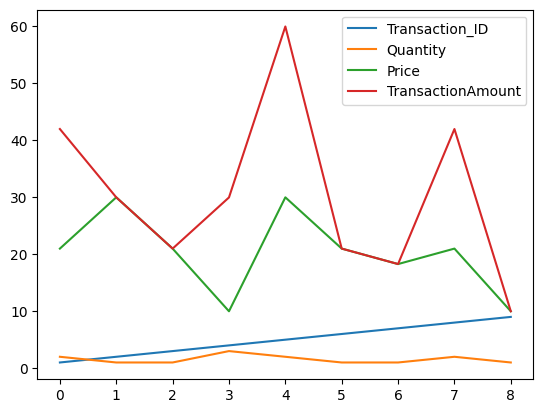

In [33]:
# Pandas uses the plot() method to create diagrams.
# We can use Pyplot, a submodule of the Matplotlib library to visualize the data
import matplotlib.pyplot as plt
sales.plot()
plt.show()

<Axes: ylabel='Frequency'>

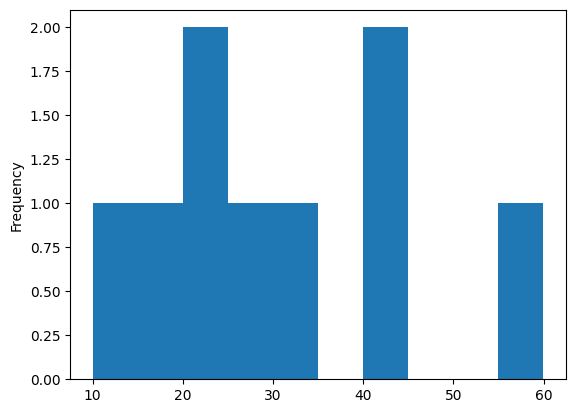

In [34]:
# Specify kind = 'hist' to indicate you want a histogram
# A histogram needs only one column (e.g., "TransactionAmount")
# A histogram shows us the frequency of each interval, e.g. how many transactions have a transaction amount between 20 and 30?
# Histograms are helpful for identifying outliers and skewed distributions
sales["TransactionAmount"].plot(kind = 'hist')

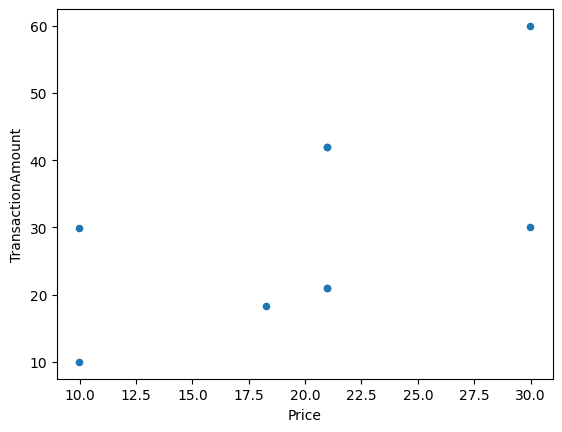

In [35]:
# Specify kind = 'scatter' to indicate you want a scatter plot
# A scatter plot needs two columns: an x- and a y-axis (e.g., Price on the x-axis and TransactionAmount on the y-axis)
sales.plot(kind = 'scatter', x = 'Price', y = 'TransactionAmount')
plt.show()
# The scatter plot suggests a positive correlation between Price and TransactionAmount